<a href="https://colab.research.google.com/github/2303A52261/STML/blob/main/STML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
path = "/content/archive (4).zip"
pd.read_csv(path)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


k-mediod

In [3]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

class KMedoids:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        self.medoids = np.random.choice(self.n_samples, self.n_clusters, replace=False)
        self.labels = np.zeros(self.n_samples)
        self.distances = pairwise_distances(X)

        for _ in range(self.max_iter):
            prev_medoids = self.medoids.copy()
            self._assign_labels()
            self._update_medoids()

            if np.all(prev_medoids == self.medoids):
                break

    def _assign_labels(self):
        for i in range(self.n_samples):
            distances_to_medoids = self.distances[i, self.medoids]
            self.labels[i] = np.argmin(distances_to_medoids)

    def _update_medoids(self):
        for i in range(self.n_clusters):
            cluster_points = np.where(self.labels == i)[0]
            if len(cluster_points) > 0:
                distances = cdist(self.X[cluster_points], self.X[cluster_points], 'euclidean')
                medoid_idx = cluster_points[np.argmin(distances.sum(axis=1))]
                self.medoids[i] = medoid_idx

    def predict(self, X):
        distances = pairwise_distances(X, self.X[self.medoids])
        return np.argmin(distances, axis=1)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(X_train)
y_pred = kmedoids.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.24444444444444444


Knn

In [4]:
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))


1.0


decision tree

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred))


1.0


svm

In [6]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))


1.0


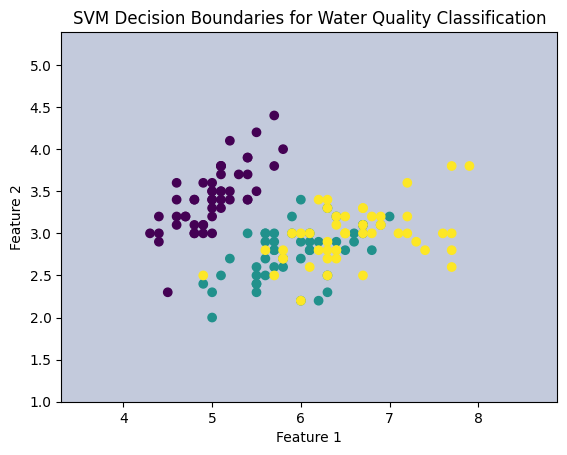

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

data = datasets.load_iris()
X = data.data[:, :2]
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
plt.title('SVM Decision Boundaries for Water Quality Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ---------------- KMedoids ----------------

import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

class KMedoids:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        self.medoids = np.random.choice(self.n_samples, self.n_clusters, replace=False)
        self.labels = np.zeros(self.n_samples)
        self.distances = pairwise_distances(X)

        for _ in range(self.max_iter):
            prev_medoids = self.medoids.copy()
            self._assign_labels()
            self._update_medoids()

            if np.all(prev_medoids == self.medoids):
                break

    def _assign_labels(self):
        for i in range(self.n_samples):
            distances_to_medoids = self.distances[i, self.medoids]
            self.labels[i] = np.argmin(distances_to_medoids)

    def _update_medoids(self):
        for i in range(self.n_clusters):
            cluster_points = np.where(self.labels == i)[0]
            if len(cluster_points) > 0:
                distances = cdist(self.X[cluster_points], self.X[cluster_points], 'euclidean')
                medoid_idx = cluster_points[np.argmin(distances.sum(axis=1))]
                self.medoids[i] = medoid_idx

    def predict(self, X):
        distances = pairwise_distances(X, self.X[self.medoids])
        return np.argmin(distances, axis=1)

kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(X_train)
y_pred_kmedoids = kmedoids.predict(X_test)

print("KMedoids:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_kmedoids))
print("Accuracy:", accuracy_score(y_test, y_pred_kmedoids))
print("Precision:", precision_score(y_test, y_pred_kmedoids, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_kmedoids, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_kmedoids, average='weighted'))

# ---------------- KNN ----------------

from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nKNN:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

# ---------------- Decision Tree ----------------

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

# ---------------- SVM ----------------

from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))


KMedoids:
Confusion Matrix:
 [[ 0 19  0]
 [ 7  0  6]
 [ 1  0 12]]
Accuracy: 0.26666666666666666
Precision: 0.1925925925925926
Recall: 0.26666666666666666
F1 Score: 0.22365591397849463

KNN:
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Decision Tree:
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

SVM:
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = ['KMedoids', 'KNN', 'Decision Tree', 'SVM']
results = {}

# KMedoids
results['KMedoids'] = {
    'accuracy': accuracy_score(y_test, y_pred_kmedoids),
    'precision': precision_score(y_test, y_pred_kmedoids, average='weighted'),
    'recall': recall_score(y_test, y_pred_kmedoids, average='weighted'),
    'f1_score': f1_score(y_test, y_pred_kmedoids, average='weighted')
}

# KNN
results['KNN'] = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn, average='weighted'),
    'recall': recall_score(y_test, y_pred_knn, average='weighted'),
    'f1_score': f1_score(y_test, y_pred_knn, average='weighted')
}

# Decision Tree
results['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'precision': precision_score(y_test, y_pred_dt, average='weighted'),
    'recall': recall_score(y_test, y_pred_dt, average='weighted'),
    'f1_score': f1_score(y_test, y_pred_dt, average='weighted')
}

# SVM
results['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm, average='weighted'),
    'recall': recall_score(y_test, y_pred_svm, average='weighted'),
    'f1_score': f1_score(y_test, y_pred_svm, average='weighted')
}

# Creating a DataFrame for comparison
comparison_df = pd.DataFrame(results).T
comparison_df.columns = ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)']

# Display comparison table
print(comparison_df)


               Accuracy  Precision (Weighted)  Recall (Weighted)  \
KMedoids       0.266667              0.192593           0.266667   
KNN            1.000000              1.000000           1.000000   
Decision Tree  1.000000              1.000000           1.000000   
SVM            1.000000              1.000000           1.000000   

               F1 Score (Weighted)  
KMedoids                  0.223656  
KNN                       1.000000  
Decision Tree             1.000000  
SVM                       1.000000  
